# 1D Convolutional Neural Network (CNN) Model Use MPS Label

### 1. Import Libraries

Import all necessary libraries.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import scipy.io
import time
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import MaxPooling1D, Conv1D, GlobalAveragePooling1D, Reshape
from tensorflow.keras.layers import GlobalAveragePooling2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Input, Dropout, Conv2D, BatchNormalization, MaxPool2D, Activation

### 2. Load Data

Load 12 sets of data with corresponding labels. Each set contains 1065 samples of training data. There are 12780 samples of training data in total.

In [3]:
dataset1 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMNYXZ_signal.mat')
dataset2 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMNYZX_signal.mat')
dataset3 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMXNYZ_signal.mat')
dataset4 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMXYZ_signal.mat')
dataset5 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMXZNY_signal.mat')
dataset6 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMXZY_signal.mat')
dataset7 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMYXZ_signal.mat')
dataset8 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMYZX_signal.mat')
dataset9 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMZNYX_signal.mat')
dataset10 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMZXNY_signal.mat')
dataset11 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMZXY_signal.mat')
dataset12 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\X_Signal\HMZYX_signal.mat')

labelset1 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMNYXZ_Y.mat')
labelset2 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMNYZX_Y.mat')
labelset3 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMXNYZ_Y.mat')
labelset4 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMXYZ_Y.mat')
labelset5 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMXZNY_Y.mat')
labelset6 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMXZY_Y.mat')
labelset7 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMYXZ_Y.mat')
labelset8 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMYZX_Y.mat')
labelset9 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMZNYX_Y.mat')
labelset10 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMZXNY_Y.mat')
labelset11 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMZXY_Y.mat')
labelset12 = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_HM\Data_HM\Y_MPS\HMZYX_Y.mat')



### 3. Data Processing

The training data of our deep learning model is the kinematic data of head impact. The kinematic dataset, consisting of angular velocity and angular acceleration data in three dimensions, is measured in 6 degrees of freedom. Together with the magnitudes, each training sample contains 8 channels. Since 70 ms of data is recorded for each sample, the initial shape of the dataset is (12780, 8, 70). We standardize all dataset’s time scale to 200 ms as the longest time frame by putting the data in the middle and concatenating zeros before and after the available data for datasets with shorter time frames. With an initial shape of (12780, 8, 70), the training data was standardized to (12780, 8, 200), and then flattened to (12780, 1600).

In [4]:

signal_matrix = np.concatenate((dataset1['signal_matrix'], dataset2['signal_matrix'],
                                dataset3['signal_matrix'], dataset4['signal_matrix'],
                                dataset5['signal_matrix'], dataset6['signal_matrix'],
                                dataset7['signal_matrix'], dataset8['signal_matrix'],
                                dataset8['signal_matrix'], dataset10['signal_matrix'],
                                dataset11['signal_matrix'], dataset12['signal_matrix']), axis=2)

#signal_matrix = np.concatenate((dataset1['signal_matrix'], dataset2['signal_matrix']), axis=2)
#print("shape", signal_matrix.shape)
zeros = np.zeros((65,8,signal_matrix.shape[2]))
#print("shape", zeros.shape)
input_matrix = np.concatenate((zeros, signal_matrix), axis=0)
input_matrix = np.concatenate((input_matrix, zeros), axis=0).T
#print(input_matrix.shape)
X = input_matrix.reshape(input_matrix.shape[0],-1)

label = np.concatenate((labelset1['label'], labelset2['label'],
                        labelset3['label'], labelset4['label'],
                        labelset5['label'], labelset6['label'],
                        labelset7['label'], labelset8['label'],
                        labelset9['label'], labelset10['label'],
                        labelset11['label'], labelset12['label']), axis=0)

#label = np.concatenate((labelset1['label'], labelset2['label']), axis=0)
print("Input Shape:", X.shape)
print("Label Shape:", label.shape)
#plt.plot(np.arange(1,201), input_matrix[:,0,0])

# CF
dataset1_CF = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_CF\Data_CF\X_signal\AF_signal.mat')
labelset1_CF = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_CF\Data_CF\Y_MPS\AF_Y.mat')
dataset2_CF  = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_CF\Data_CF\X_signal\PAC_signal.mat')
labelset2_CF = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_CF\Data_CF\Y_MPS\PAC_Y.mat')


zeros = np.zeros((50,8,dataset1_CF['signal_matrix'].shape[2]))
dataset1_CF = np.concatenate((zeros, dataset1_CF['signal_matrix']), axis=0)
dataset1_CF = np.concatenate((dataset1_CF, zeros), axis=0)
input_matrix_CF = np.concatenate((dataset1_CF, dataset2_CF['signal_matrix']), axis=2).T
X_CF = input_matrix_CF.reshape(input_matrix_CF.shape[0],-1)

label_CF = np.concatenate((labelset1_CF['label'], labelset2_CF['label']), axis=0)

# MMA
dataset1_MMA = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_MMA\Data_MMA\X_signal\MMA_1_signal.mat')
labelset1_MMA = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_MMA\Data_MMA\Y_MPS\MMA_1_Y.mat')
dataset2_MMA = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_MMA\Data_MMA\X_signal\MMA_2_signal.mat')
labelset2_MMA = scipy.io.loadmat('E:\Stanford_Autumn_2021\CS_230\Project\Dataset\Data_MMA\Data_MMA\Y_MPS\MMA_2_Y.mat')

input_matrix_MMA = np.concatenate((dataset1_MMA['signal_matrix'], dataset2_MMA['signal_matrix']), axis=2).T
X_MMA = input_matrix_MMA.reshape(input_matrix_MMA.shape[0],-1)

label_MMA = np.concatenate((labelset1_MMA['label'], labelset2_MMA['label']), axis=0)

Input Shape: (12780, 1600)
Label Shape: (12780, 4124)


Call the function below with different value of n to draw the $n^{th}$ sample. Since each sample has 8 channels of data. There would be 8 plots, corresponding to angular velocity and angular acceleration in three dimensions and also their magnitudes.

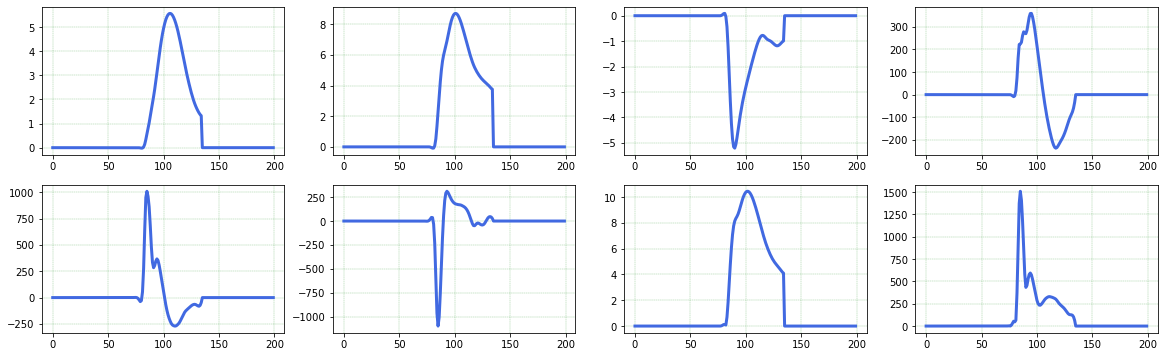

In [5]:
sampleN = 9 # index of sample to draw

def PrintInput(n):
    fig, axs = plt.subplots(2, 4, figsize=(20,6))
    
    for i in range(8):
        axs[i//4, i%4].plot(input_matrix[n,i], color='royalblue', alpha = 1, linewidth=3.0)
        axs[i//4, i%4].grid(color='g', ls = '-.', lw = 0.2)
    
    plt.show()

PrintInput(sampleN)

Since the data with 8 channels are flattened to 1D for training, lets plot the flattened version of the $n^{th}$ sample below.

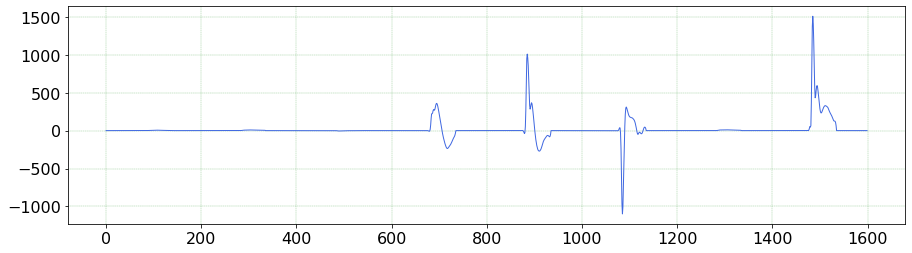

In [6]:
def PrintInputFlattened(n):
    fig, axs = plt.subplots(figsize=(15,4))
    axs.plot(X[n], color='royalblue', alpha = 1, linewidth=1.0, label="Train")
    axs.grid(color='g', ls = '-.', lw = 0.2)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.show()

PrintInputFlattened(sampleN)

### 4. Split into Training, Dev and Test Set

There are 12780 samples in total. The function below splits it into training, dev, and test set with fraction of $8:1:1$. There will be 10224 samples of data in training set, 1278 samples of data in dev set, and 1278 samples of data in test set.

In [7]:
X = normalize(X, axis=1, norm='max')
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5)

X_CF = normalize(X_CF, axis=1, norm='max')
X_CF_train, X_CF_test, y_CF_train, y_CF_test = train_test_split(X_CF, label_CF, test_size=0.5)

X_MMA = normalize(X_MMA, axis=1, norm='max')
X_MMA_train, X_MMA_test, y_MMA_train, y_MMA_test = train_test_split(X_MMA, label_MMA, test_size=0.5)

X_dev = np.concatenate((X_dev,X_CF_train,X_MMA_train))
y_dev = np.concatenate((y_dev,y_CF_train,y_MMA_train))
print(f"X_train = {X_train.shape}")
print(X_train)
print(f"y_train = {y_train.shape}")
print(y_train)
print(f"X_dev = {X_dev.shape}")
print(X_dev)
print(f"y_dev = {y_dev.shape}")
print(y_dev)
print(f"X_test = {X_test.shape}")
print(X_test)
print(f"y_test = {y_test.shape}")
print(y_test)

X_train = (10224, 1600)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_train = (10224, 4124)
[[0.07167651 0.07333526 0.06433523 ... 0.02453235 0.02476236 0.02841604]
 [0.04070966 0.06048874 0.03851344 ... 0.02887577 0.02558112 0.02526508]
 [0.35207152 0.29505926 0.3036091  ... 0.05175217 0.04372288 0.04274642]
 ...
 [0.07572705 0.07085834 0.07003975 ... 0.01290509 0.01110019 0.01158797]
 [0.33881521 0.23803695 0.28795895 ... 0.04481815 0.0386766  0.04105548]
 [0.03974345 0.0417251  0.03713918 ... 0.01362682 0.01068702 0.01238782]]
X_dev = (1657, 1600)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.135588

To make our training faster, we want our training data to be normalized. This function plots the $n^{th}$ sample after being normalized.

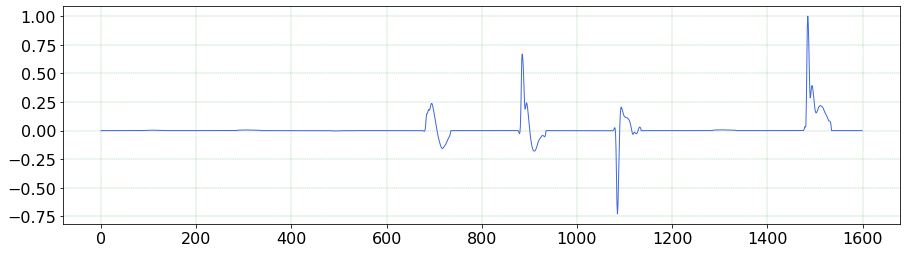

In [7]:
def PrintInputFlattenedNorm(n):
    fig, axs = plt.subplots(figsize=(15,4))
    axs.plot(X[n], color='royalblue', alpha = 1, linewidth=1.0, label="Train")
    axs.grid(color='g', ls = '-.', lw = 0.2)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.show()

PrintInputFlattenedNorm(sampleN)

### 5. Model Construction and Training

Here we construct the architecture of our 1D CNN model and train it. In this model, we use MPS as our label.

In [8]:
# The number of steps within one time segment
num_classes = y_train.shape[1]
kernel_size = 2

input1 = keras.Input(shape=(1600,1))
x = Conv1D(64, kernel_size, activation='relu')(input1)
x = Conv1D(64, kernel_size, activation='relu')(x)
x = MaxPooling1D(2)(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(400, activation='relu')(x)
x = Dense(100, activation='relu')(x)
output1 = Dense(num_classes)(x)
model_conv1D = tf.keras.Model(inputs=input1, outputs=output1)

#Adam = tf.keras.optimizers.Adam(learning_rate = 0.001, decay=1e-6)
model_conv1D.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', metrics=['RootMeanSquaredError'])

print(model_conv1D.summary())

X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_dev_reshaped = np.reshape(X_dev, (X_dev.shape[0], X_dev.shape[1], 1))

history = model_conv1D.fit(X_train_reshaped, y_train, epochs=100,
          batch_size=128, verbose=1,
          validation_data=(X_dev_reshaped, y_dev))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1600, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1599, 64)          192       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1598, 64)          8256      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 799, 64)           0         
_________________________________________________________________
dropout (Dropout)            (None, 799, 64)           0         
_________________________________________________________________
flatten (Flatten)            (None, 51136)             0         
_________________________________________________________________
dense (Dense)                (None, 400)               204548

Epoch 84/100
80/80 [==============================] - 17s 214ms/step - loss: 2.0739e-04 - root_mean_squared_error: 0.0144 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0360
Epoch 85/100
80/80 [==============================] - 17s 213ms/step - loss: 2.0989e-04 - root_mean_squared_error: 0.0145 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0352
Epoch 86/100
80/80 [==============================] - 17s 213ms/step - loss: 2.0676e-04 - root_mean_squared_error: 0.0144 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0355
Epoch 87/100
80/80 [==============================] - 17s 218ms/step - loss: 2.0711e-04 - root_mean_squared_error: 0.0144 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0354
Epoch 88/100
80/80 [==============================] - 17s 218ms/step - loss: 2.0208e-04 - root_mean_squared_error: 0.0142 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0349
Epoch 89/100
80/80 [==============================] - 18s 219ms/step - loss: 2.0133e-04 - root_mean_squar

Save the trained model

In [9]:
model_conv1D.save("Conv1D_MPS_Real.h5") # save as h5 (used in Keras)

### 6. Plot the training result

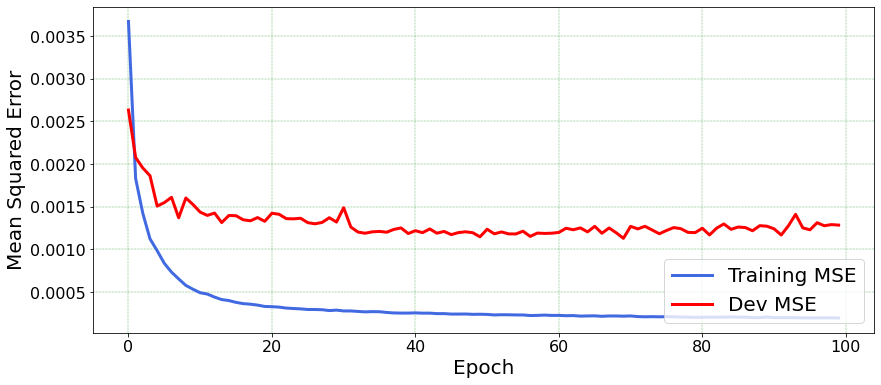

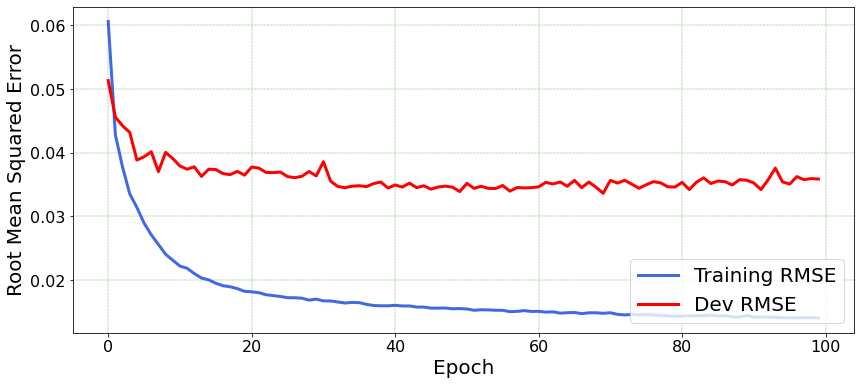

In [10]:
def printHistory(history):
       loss_curve = history.history["loss"]
       rmse_curve = history.history["root_mean_squared_error"]

       loss_dev_curve = history.history["val_loss"]
       rmse_dev_curve = history.history["val_root_mean_squared_error"]

       fig1, axs1 = plt.subplots(figsize=(14,6))
       axs1.plot(loss_curve, color='royalblue', alpha = 1, linewidth=3.0, label="Training MSE")
       axs1.plot(loss_dev_curve, color='red', alpha = 1, linewidth=3.0, label="Dev MSE")
       axs1.set_ylabel('Mean Squared Error', fontsize=20)
       axs1.set_xlabel('Epoch', fontsize=20)
       axs1.grid(color='g', ls = '-.', lw = 0.3)
       plt.xticks(fontsize = 16)
       plt.yticks(fontsize = 16)
       plt.legend(loc='lower right', fontsize=20)
       plt.show()
       
       fig2, axs2 = plt.subplots(figsize=(14,6))
       axs2.plot(rmse_curve, color='royalblue', alpha = 1, linewidth=3.0, label="Training RMSE")
       axs2.plot(rmse_dev_curve, color='red', alpha = 1, linewidth=3.0, label="Dev RMSE")
       axs2.set_ylabel('Root Mean Squared Error', fontsize=20)
       axs2.set_xlabel('Epoch', fontsize=20)
       axs2.grid(color='g', ls = '-.', lw = 0.3)
       plt.xticks(fontsize = 16)
       plt.yticks(fontsize = 16)
       plt.legend(loc='lower right', fontsize=20)
       plt.show()
       
       #fig2, axs2 = plt.subplots(figsize=(14,6))
       #axs2.plot(rmse_curve, color='royalblue', alpha = 1, linewidth=3.0, label="loss")
       #axs2.plot(rmse_dev_curve, color='red', alpha = 1, linewidth=3.0, label="val_loss")
       #axs2.set_ylabel('Root Mean Squared Error', fontsize=20)
       #axs2.set_yscale('log')
       #axs2.set_xlabel('Epoch', fontsize=20)
       #axs2.grid(color='g', ls = '-.', lw = 0.3)
       #plt.xticks(fontsize = 16)
       #plt.yticks(fontsize = 16)
       #plt.legend(loc='lower right', fontsize=20)
       #plt.show()
printHistory(history)

### 7. Evaluate the Inference Speed

Load the model

In [8]:
model_1D = load_model("Conv1D_MPS_Real.h5")

Calculate the inference speed by averaging 1000 inference.

In [12]:
def InferenceSpeed(model):
    start = time.time()
    for i in range(1000):
        inputData = X[i].reshape((1, X[i].shape[0]))
        inputData = np.reshape(inputData, (inputData.shape[0], inputData.shape[1], 1))
        prediction = model.predict(inputData)
    end = time.time()
    return "Inference speed = " + str((end-start)/1000) + " s"

print(InferenceSpeed(model_1D))

Inference speed = 0.030889140844345093 s


### 8. Accuracy on Test Set

Evaluate the performance by predicting on test set (simulated data).

In [9]:
import csv

total = 0
predictions = []
fileName = "HM_MPS_Real_prediction.csv"

for i in range(X_test.shape[0]):
    inputData = X_test[i].reshape((1, X_test[i].shape[0]))
    inputData = np.reshape(inputData, (inputData.shape[0], inputData.shape[1], 1))
    prediction = model_1D.predict(inputData)
    predictions.append(list(prediction[0]))
    #predictions[str(i+1)] = prediction
    #np.append(predictions, prediction, axis=0)
    total += np.square(np.subtract(y_test[i].reshape((1, y_test[i].shape[0])), prediction)).mean()

with open(fileName, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(predictions)
print("Mean Sqaure Error = " + str(total/X_test.shape[0]))
print("Root Mean Sqaure Error = " + str(np.sqrt(total/X_test.shape[0])))
#scipy.io.savemat("HM_MPS_prediction.mat", predictions)

Mean Sqaure Error = 0.00020259109161789959
Root Mean Sqaure Error = 0.014233449744102783


Evaluate the performance by predicting on test set (real data).

In [10]:
from math import sqrt

total = 0
predictions_CF = []
fileName_CF = "CF_MPS_Real_prediction.CSV"
for i in range(X_CF_test.shape[0]):
    inputData = X_CF_test[i].reshape((1, X_CF_test[i].shape[0]))
    inputData = np.reshape(inputData, (inputData.shape[0], inputData.shape[1], 1))
    prediction = model_1D.predict(inputData)
    predictions_CF.append(list(prediction[0]))
    #predictions_CF[str(i+1)] = prediction
    total += np.square(np.subtract(y_CF_test[i].reshape((1, y_CF_test[i].shape[0])), prediction)).mean()
with open(fileName_CF, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(predictions_CF)
print("Mean Sqaure Error (CF) = " + str(total/X_CF_test.shape[0]))
print("Root Mean Sqaure Error (CF) = " + str(sqrt(total/X_CF_test.shape[0])))
#scipy.io.savemat("CF_MPS_Real_prediction.mat", predictions)

total = 0
predictions_MMA = []
fileName_MMA = "MMA_MPS_Real_prediction.csv"
for i in range(X_MMA_test.shape[0]):
    inputData = X_MMA_test[i].reshape((1, X_MMA_test[i].shape[0]))
    inputData = np.reshape(inputData, (inputData.shape[0], inputData.shape[1], 1))
    prediction = model_1D.predict(inputData)
    predictions_MMA.append(list(prediction[0]))
    #predictions_MMA[str(i+1)] = prediction
    total += np.square(np.subtract(y_MMA_test[i].reshape((1, y_MMA_test[i].shape[0])), prediction)).mean()
with open(fileName_MMA, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(predictions_MMA)
print("Mean Sqaure Error (MMA) = " + str(total/X_MMA_test.shape[0]))
print("Root Mean Sqaure Error (MMA) = " + str(sqrt(total/X_MMA_test.shape[0])))
#scipy.io.savemat("MMA_MPS_Real_prediction.mat", predictions)

Mean Sqaure Error (CF) = 0.005064427342833167
Root Mean Sqaure Error (CF) = 0.0711647900498074
Mean Sqaure Error (MMA) = 0.003934915141896847
Root Mean Sqaure Error (MMA) = 0.0627289019662934
